<a href="https://colab.research.google.com/github/Donguk-Jung/Deep-Learning/blob/main/cnn_KJT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 프로젝트 샘플 파일

### 텐서플로 임포트하기

In [120]:
import numpy as np
from tensorflow import keras
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
tf.random.set_seed(42)

### MNIST 데이터셋 다운로드하고 준비하기

In [121]:
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

# 픽셀 값을 0~1 사이로 정규화합니다.
train_images, test_images = train_images / 255.0, test_images / 255.0

### 합성곱 층 만들기

아래 model.summary() 의 출력을 참조하여 모델을 구현한다.   
단, 모델은  함수형 API를 이용하여 구현한다.

In [122]:
model = Sequential()

#합성곱층
model.add(Conv2D(32,(3,3), input_shape=(28,28,1), activation = 'relu'))
#풀링층
model.add(MaxPooling2D(2,2))
#합성곱층
model.add(Conv2D(64,(3,3), activation = 'relu'))
#풀링층
model.add(MaxPooling2D(2,2))
#합성곱층
model.add(Conv2D(64,(3,3), activation = 'relu'))
#완전연결층
model.add(Flatten())
model.add(Dense(64, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))

In [123]:
model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_39 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_26 (MaxPoolin  (None, 13, 13, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_40 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_27 (MaxPoolin  (None, 5, 5, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_41 (Conv2D)          (None, 3, 3, 64)          36928     
                                                                 
 flatten_13 (Flatten)        (None, 576)             

### 모델 컴파일과 훈련하기 

아래 셀에 model.compile 및 model.fit을 구현한다.

In [124]:
#학습
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
history = model.fit(train_images, train_labels, validation_split=0.25, epochs=6)

Epoch 1/6
1407/1407 [==============================] - 12s 8ms/step - loss: 0.1673 - accuracy: 0.9475 - val_loss: 0.0670 - val_accuracy: 0.9804
Epoch 2/6
1407/1407 [==============================] - 12s 8ms/step - loss: 0.0516 - accuracy: 0.9838 - val_loss: 0.0516 - val_accuracy: 0.9852
Epoch 3/6
1407/1407 [==============================] - 11s 8ms/step - loss: 0.0345 - accuracy: 0.9891 - val_loss: 0.0426 - val_accuracy: 0.9875
Epoch 4/6
1407/1407 [==============================] - 12s 8ms/step - loss: 0.0263 - accuracy: 0.9919 - val_loss: 0.0451 - val_accuracy: 0.9869
Epoch 5/6
1407/1407 [==============================] - 11s 8ms/step - loss: 0.0205 - accuracy: 0.9931 - val_loss: 0.0424 - val_accuracy: 0.9892
Epoch 6/6
1407/1407 [==============================] - 12s 8ms/step - loss: 0.0175 - accuracy: 0.9942 - val_loss: 0.0405 - val_accuracy: 0.9887


### 정확도 그래프 그리기 

아래 셀에 train과 val의 정확도 그래프를 그린다.

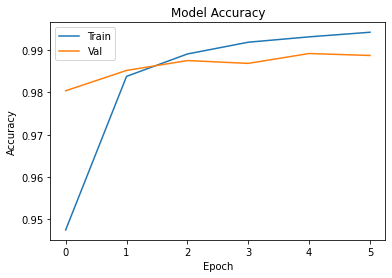

In [125]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
# plt.ylim(0.9,1.0)
# plt.xlim(1,10)

plt.legend(['Train', 'Val'])
plt.show()

### 모델 평가 - 아래 셀에 모델 평가 코드를 구현한다.

In [126]:
test_loss, test_acc = model.evaluate(test_images,  test_labels)

313/313 [==============================] - 1s 4ms/step - loss: 0.0330 - accuracy: 0.9901


In [127]:
print(test_acc)

0.9901000261306763
